# Imports

In [49]:
import pandas                                  as pd
import seaborn                                 as sns
import statsmodels.api                         as sm
from matplotlib            import pyplot        as plt 
from sklearn               import linear_model
from sklearn               import cross_validation, metrics
from sklearn.linear_model  import LinearRegression
from sklearn.preprocessing import LabelEncoder
from IPython.core.display  import display, HTML

## Jupter settings

In [2]:
# Figure settings
%matplotlib inline
%pylab inline
plt.style.use( 'bmh' )
plt.rcParams['figure.figsize'] = [25,12]
plt.rcParams['font.size'] = 24
sns.set()

# Jupter notebook settings
display( HTML( "<style>.container { width:100% !important; }</style>" ))
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option('display.expand_frame_repr', False)

Populating the interactive namespace from numpy and matplotlib


# Read dataset

In [3]:
df_raw = pd.read_csv( 'dataset/big_mart_train.csv' )
df_raw_test = pd.read_csv( 'dataset/big_mart_test.csv' )

In [4]:
df_raw.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


---
# Exploratory Data Analysis - EDA
---

In [5]:
df = df_raw

In [6]:
# Check for duplicates
#ids_unique = df['Item_Identifier'].drop_duplicates().shape[0]
ids_unique = len( set( df['Item_Identifier'] ) )
ids_total = df.shape[0]
ids_duplicated = ids_total - ids_unique

print( 'There are {} duplicate IDs for {} total entries'.format( ids_duplicated, ids_total ) )

There are 6964 duplicate IDs for 8523 total entries


## Univariate Analysis

In [7]:
mx = df['Item_Outlet_Sales'].max() 
mn = df['Item_Outlet_Sales'].min() 
print( mx )
print( mn )
print( mx - mn )

13086.9648
33.29
13053.6748


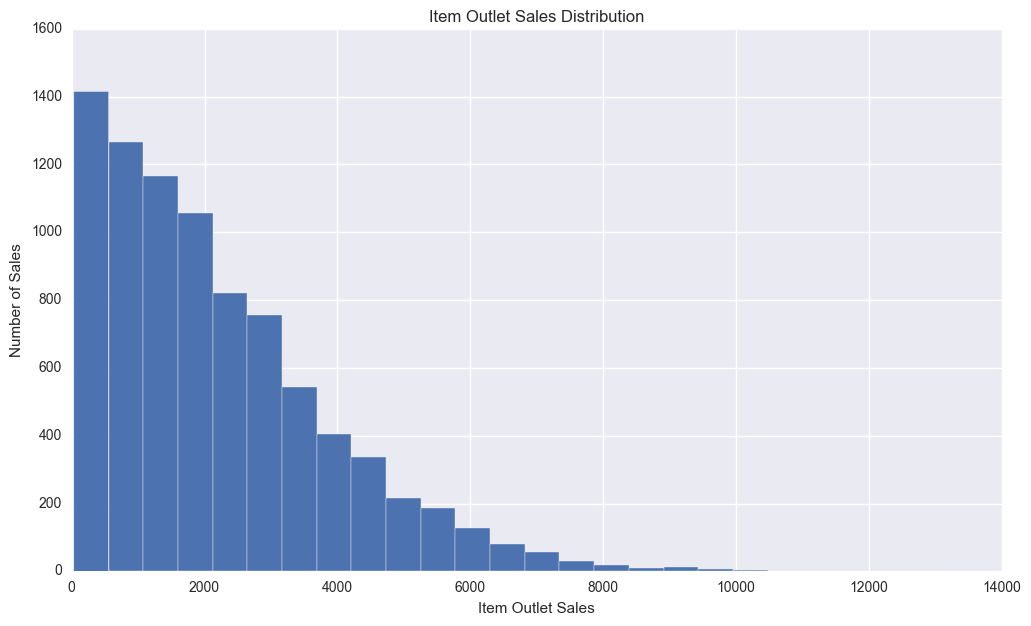

In [8]:
plt.figure( figsize=(12, 7) )
df['Item_Outlet_Sales'].hist( bins=25 )
plt.ticklabel_format( style='plain', axis='x', scilimits=(0,1) )
plt.xlabel( 'Item Outlet Sales')
plt.ylabel( 'Number of Sales' )
plt.title( 'Item Outlet Sales Distribution' )

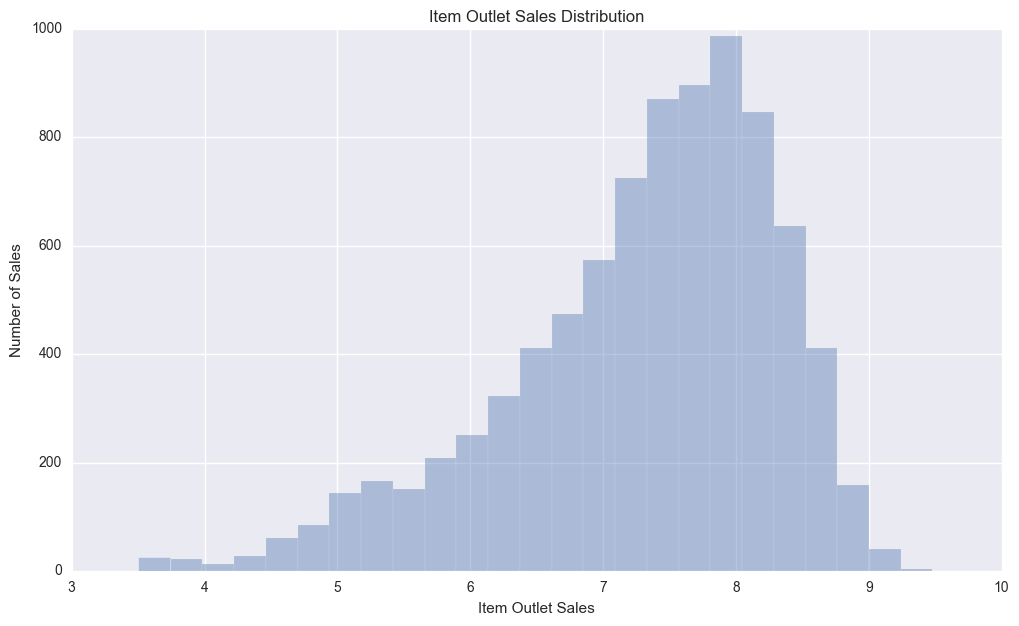

In [9]:
plt.figure( figsize=(12, 7) )
sns.distplot( np.log( df['Item_Outlet_Sales'] ), kde=False, bins=25 )
plt.ticklabel_format( style='plain', axis='x', scilimits=(0,1) )
plt.xlabel( 'Item Outlet Sales')
plt.ylabel( 'Number of Sales' )
plt.title( 'Item Outlet Sales Distribution' )

In [10]:
print( 'Skew is: {}'.format( df['Item_Outlet_Sales'].skew() ) )
print( 'Kurtosis: {}'.format( df['Item_Outlet_Sales'].kurt() ) )

Skew is: 1.1775306028542798
Kurtosis: 1.6158766814287264


## Numerical Predictors

In [11]:
num_features = df.select_dtypes( include=[np.number] )
num_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

### Correlation between Numerical Predictors and Response Variables

In [12]:
corr = num_features.corr()
corr['Item_Outlet_Sales'].sort_values( ascending=False )

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

## Categorical Predictors

### Distribution of the variable Item_Fat_Content

In [13]:
corr['Item_Outlet_Sales'].sort_values( ascending=False )

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

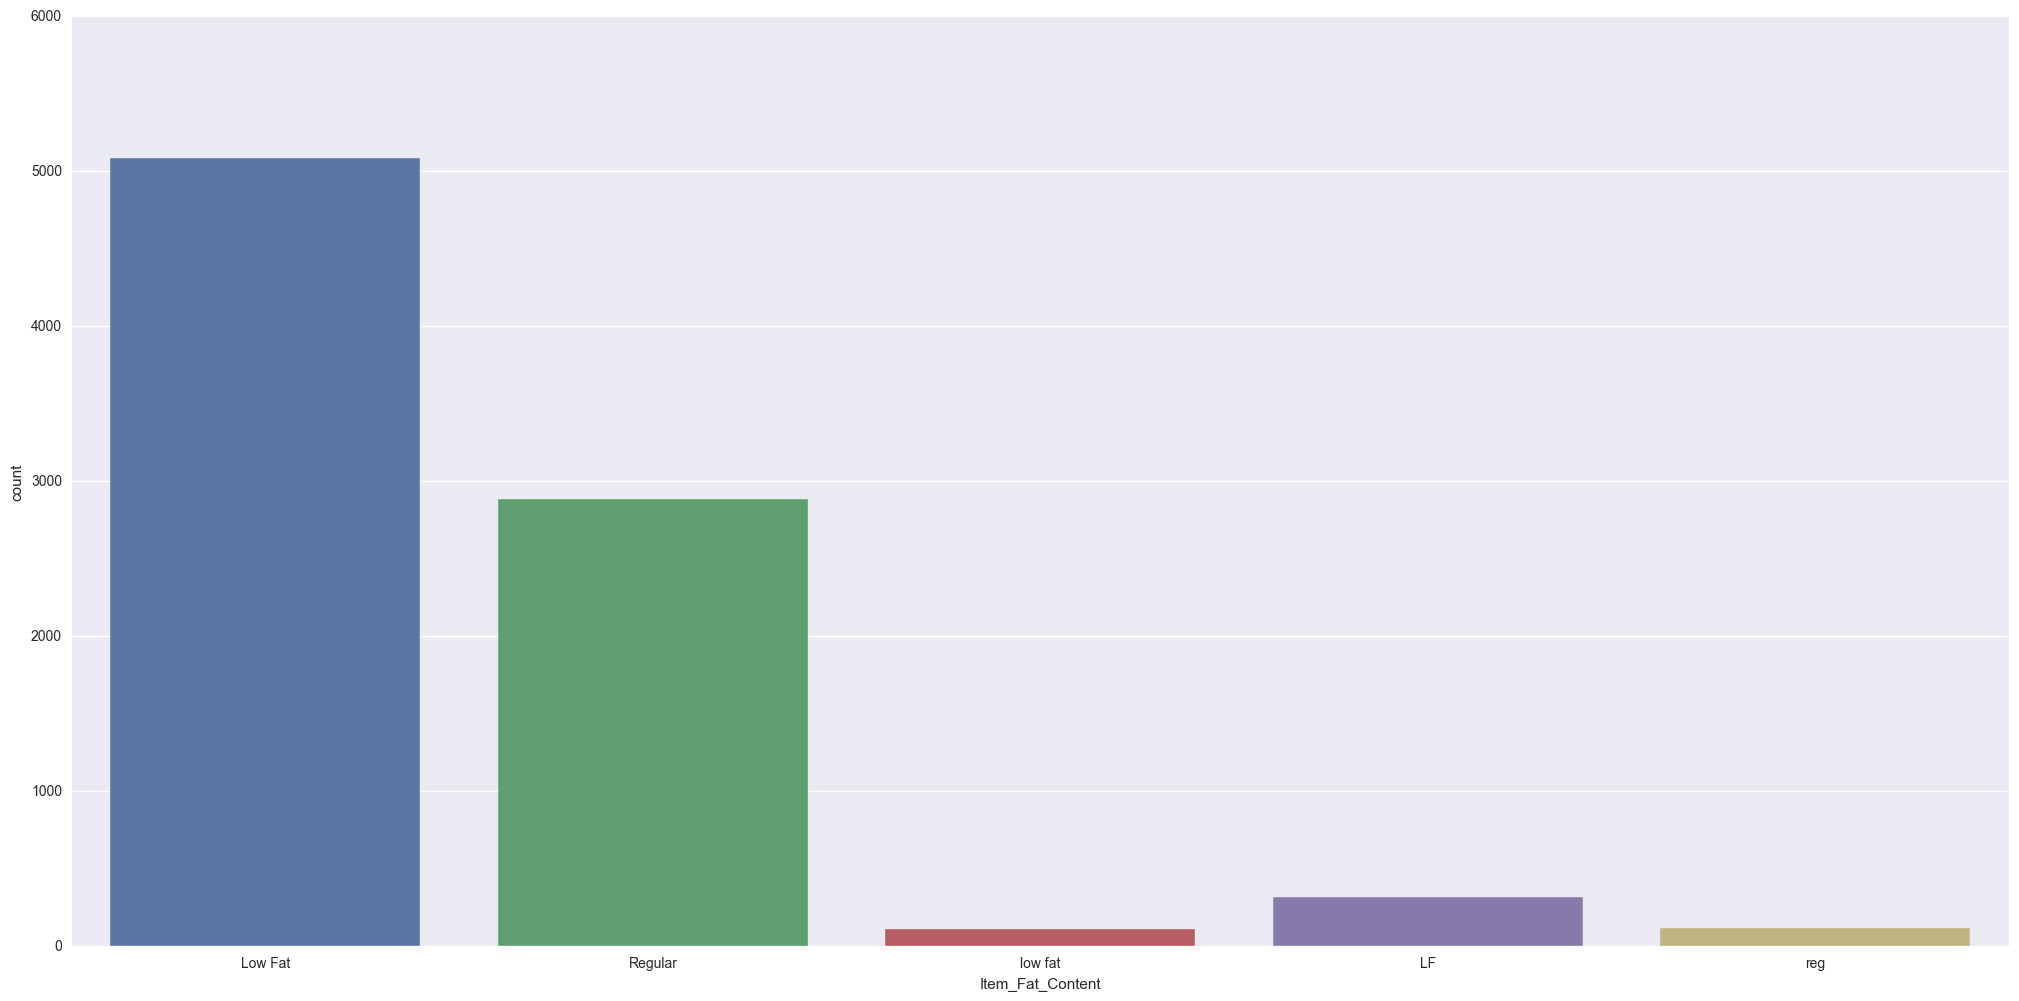

In [14]:
sns.countplot( df['Item_Fat_Content'] );

### Distribution of the variable Item_Type

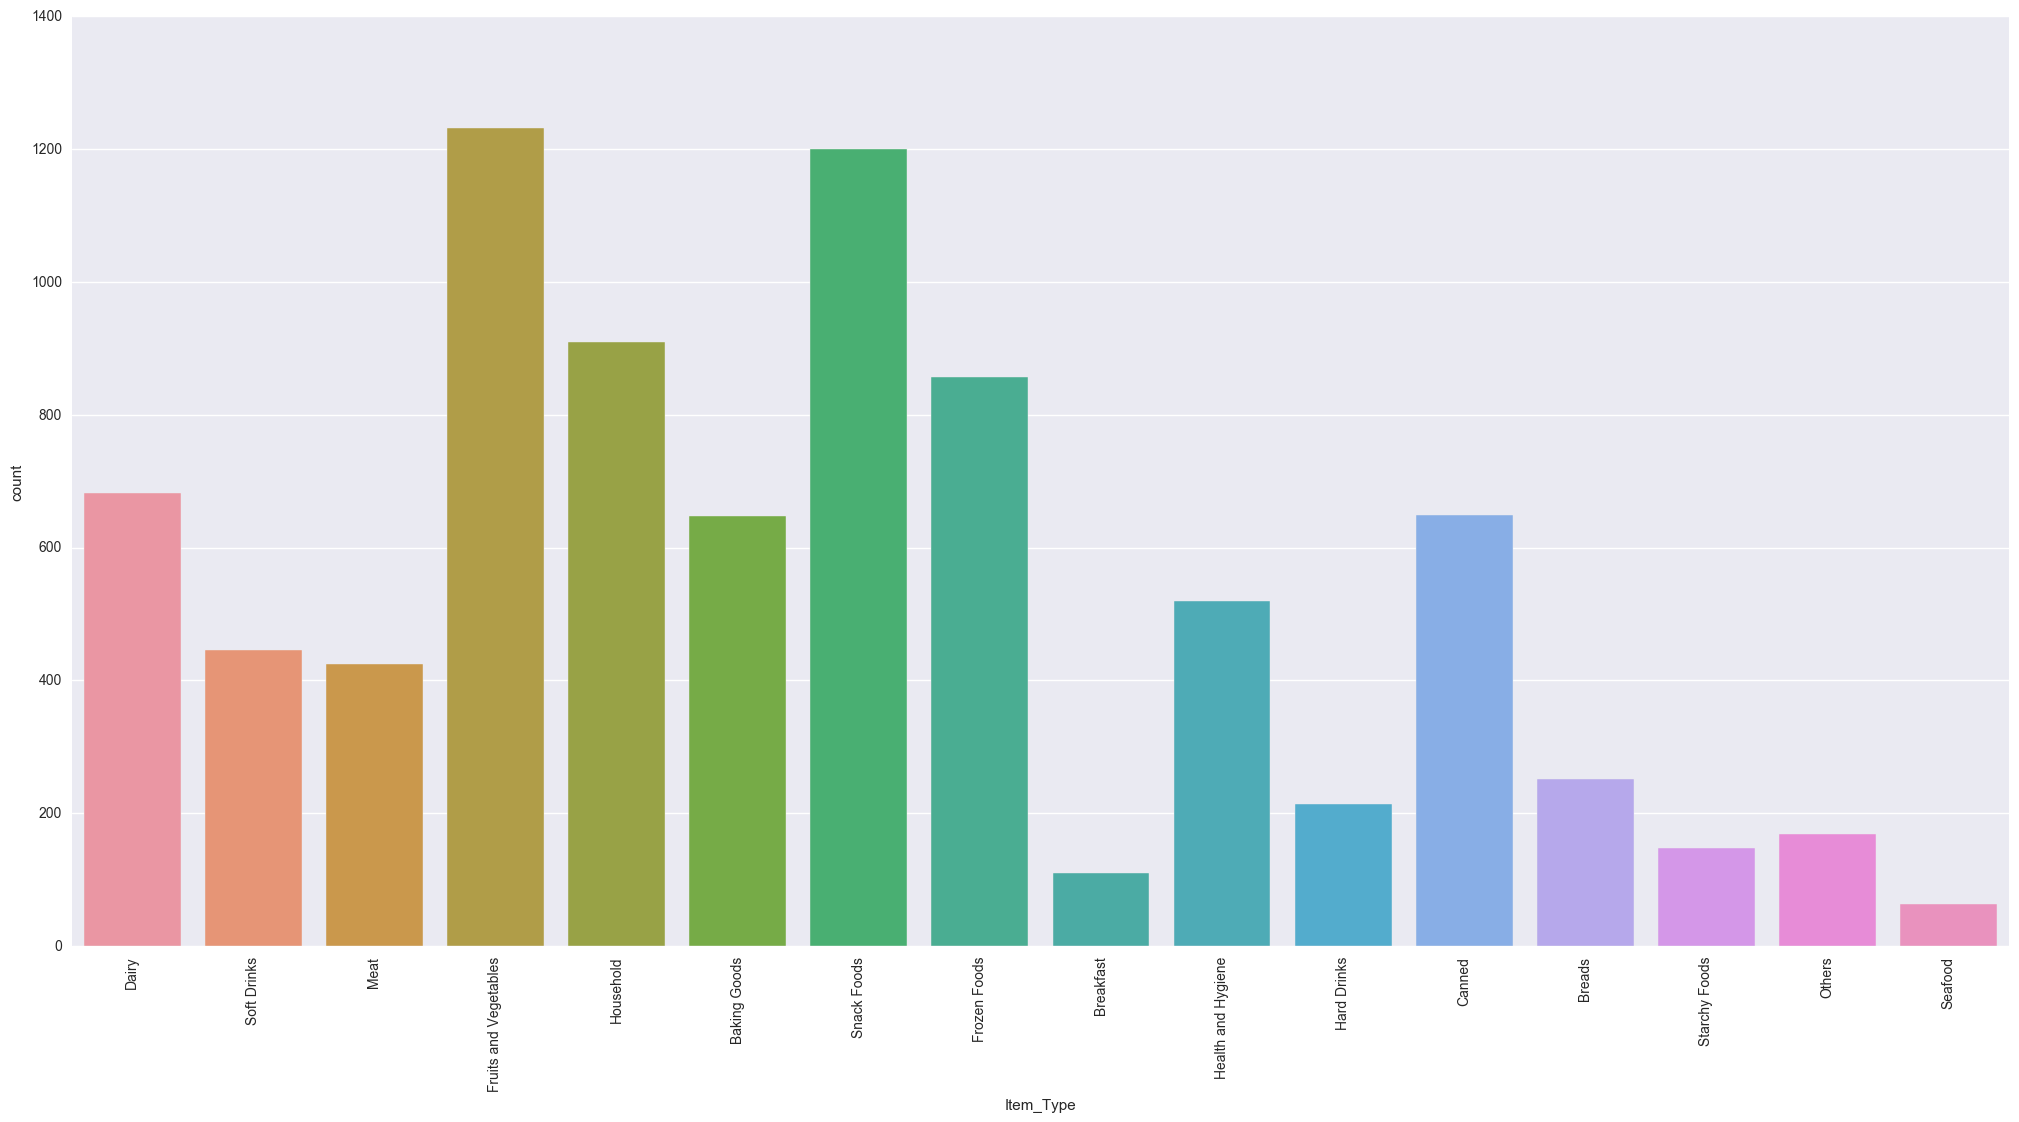

In [15]:
sns.countplot( df['Item_Type'] )
plt.xticks( rotation=90 );

### Distribution of the variable Outlet_Size

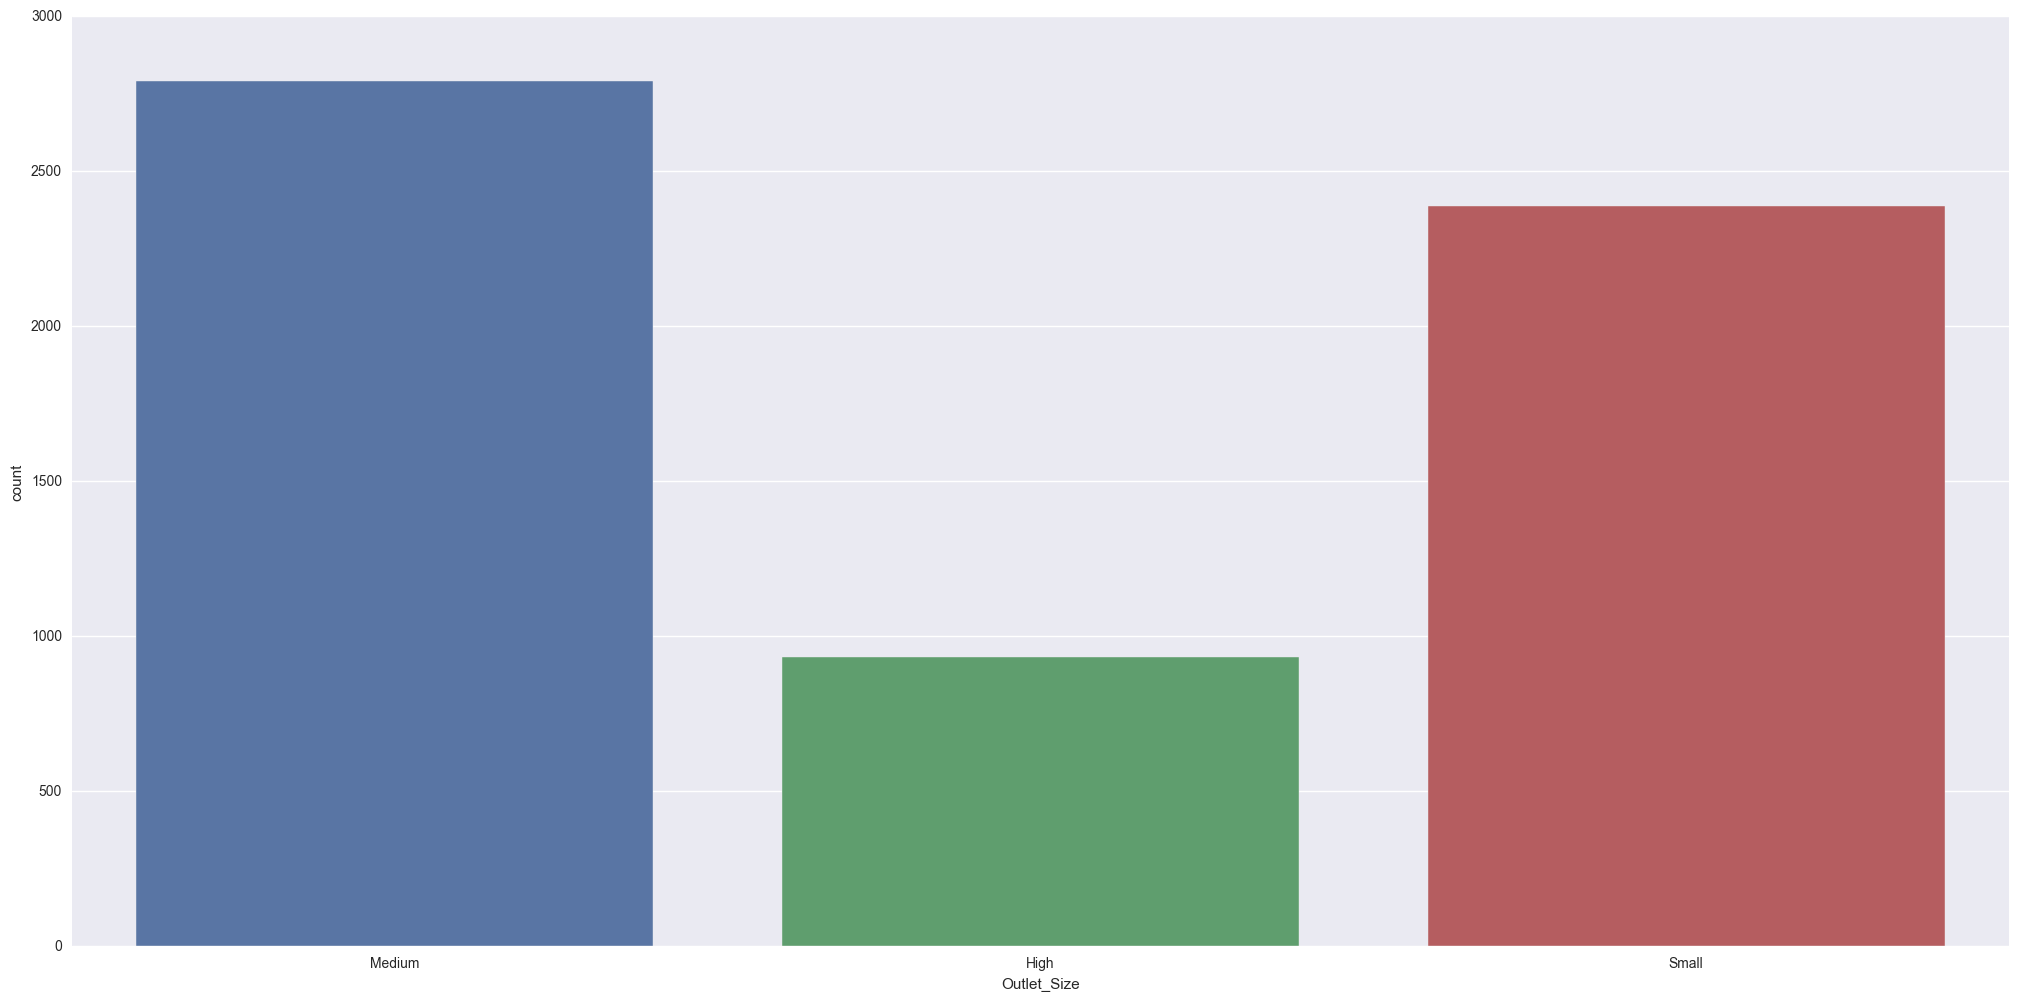

In [16]:
sns.countplot( df['Outlet_Size'] );

### Distribution of the variable Outlet_Location_Type

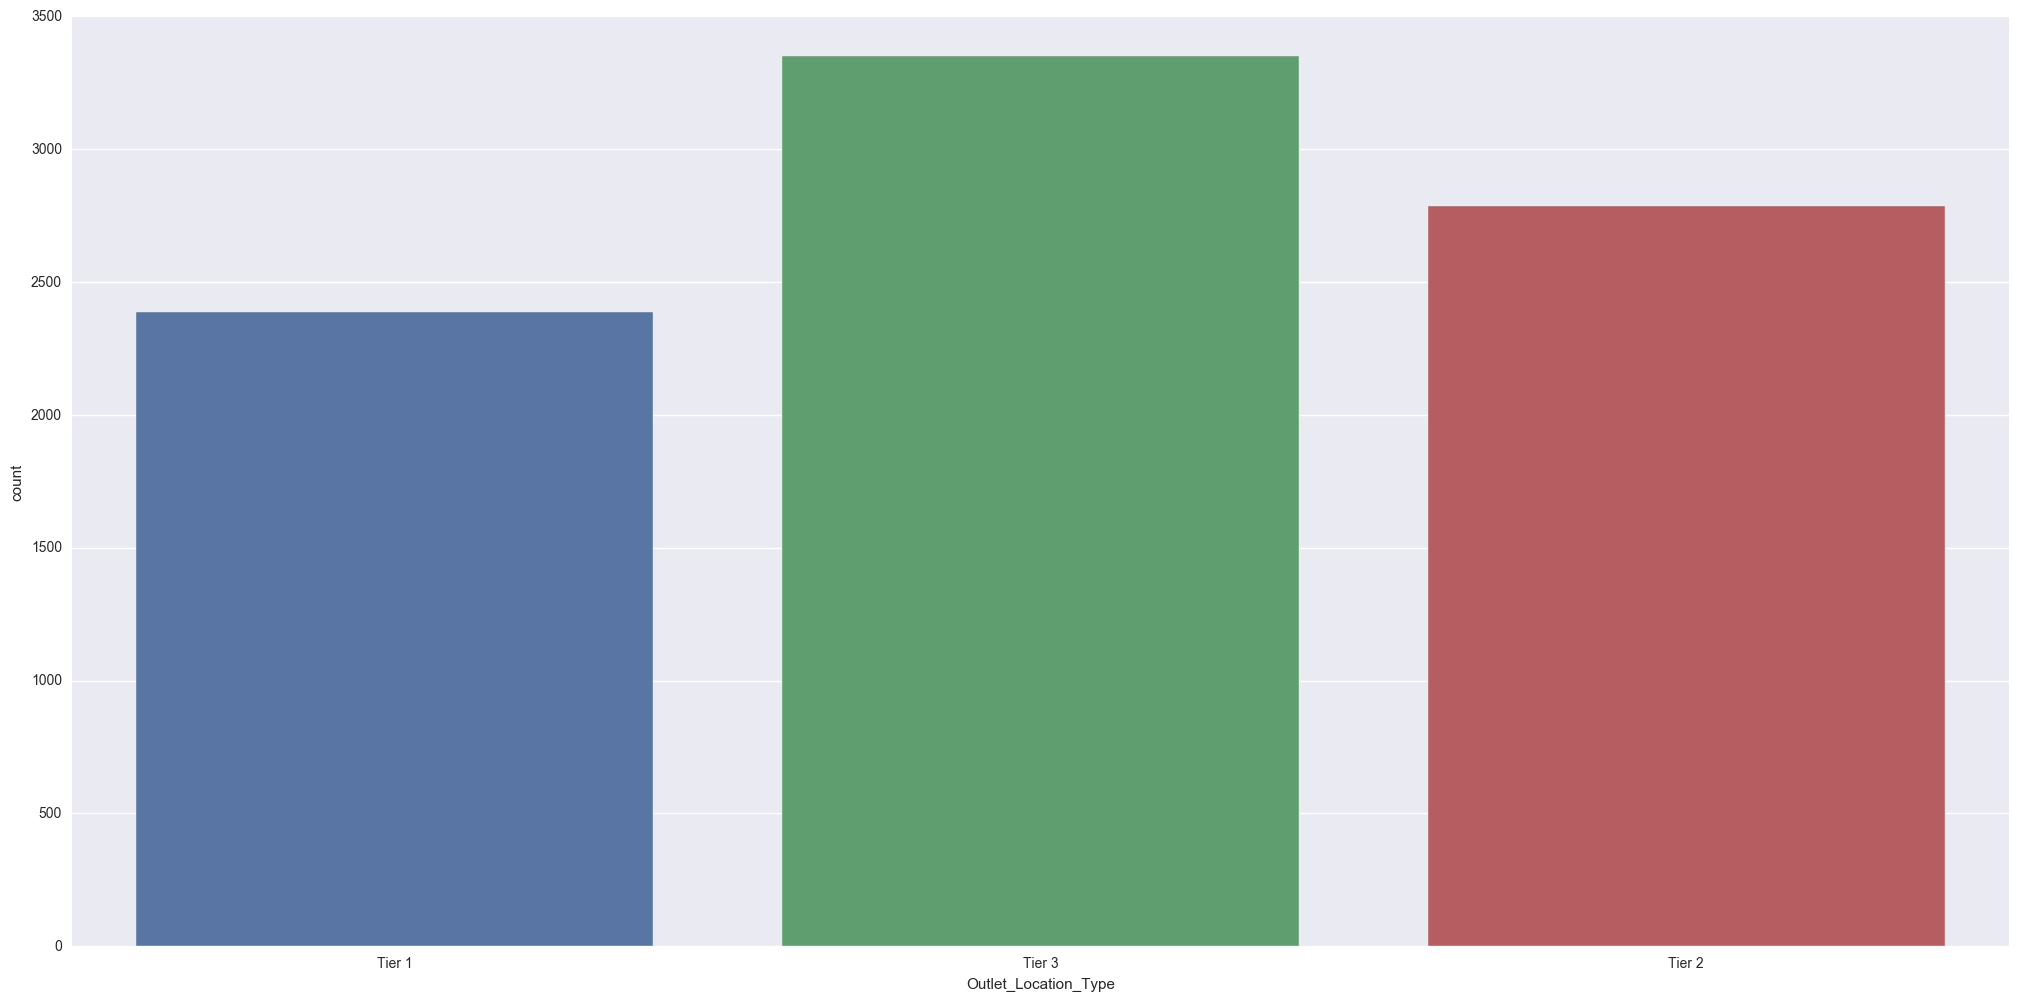

In [17]:
sns.countplot( df['Outlet_Location_Type'] );

### Distribution of the variable Outlet_Type

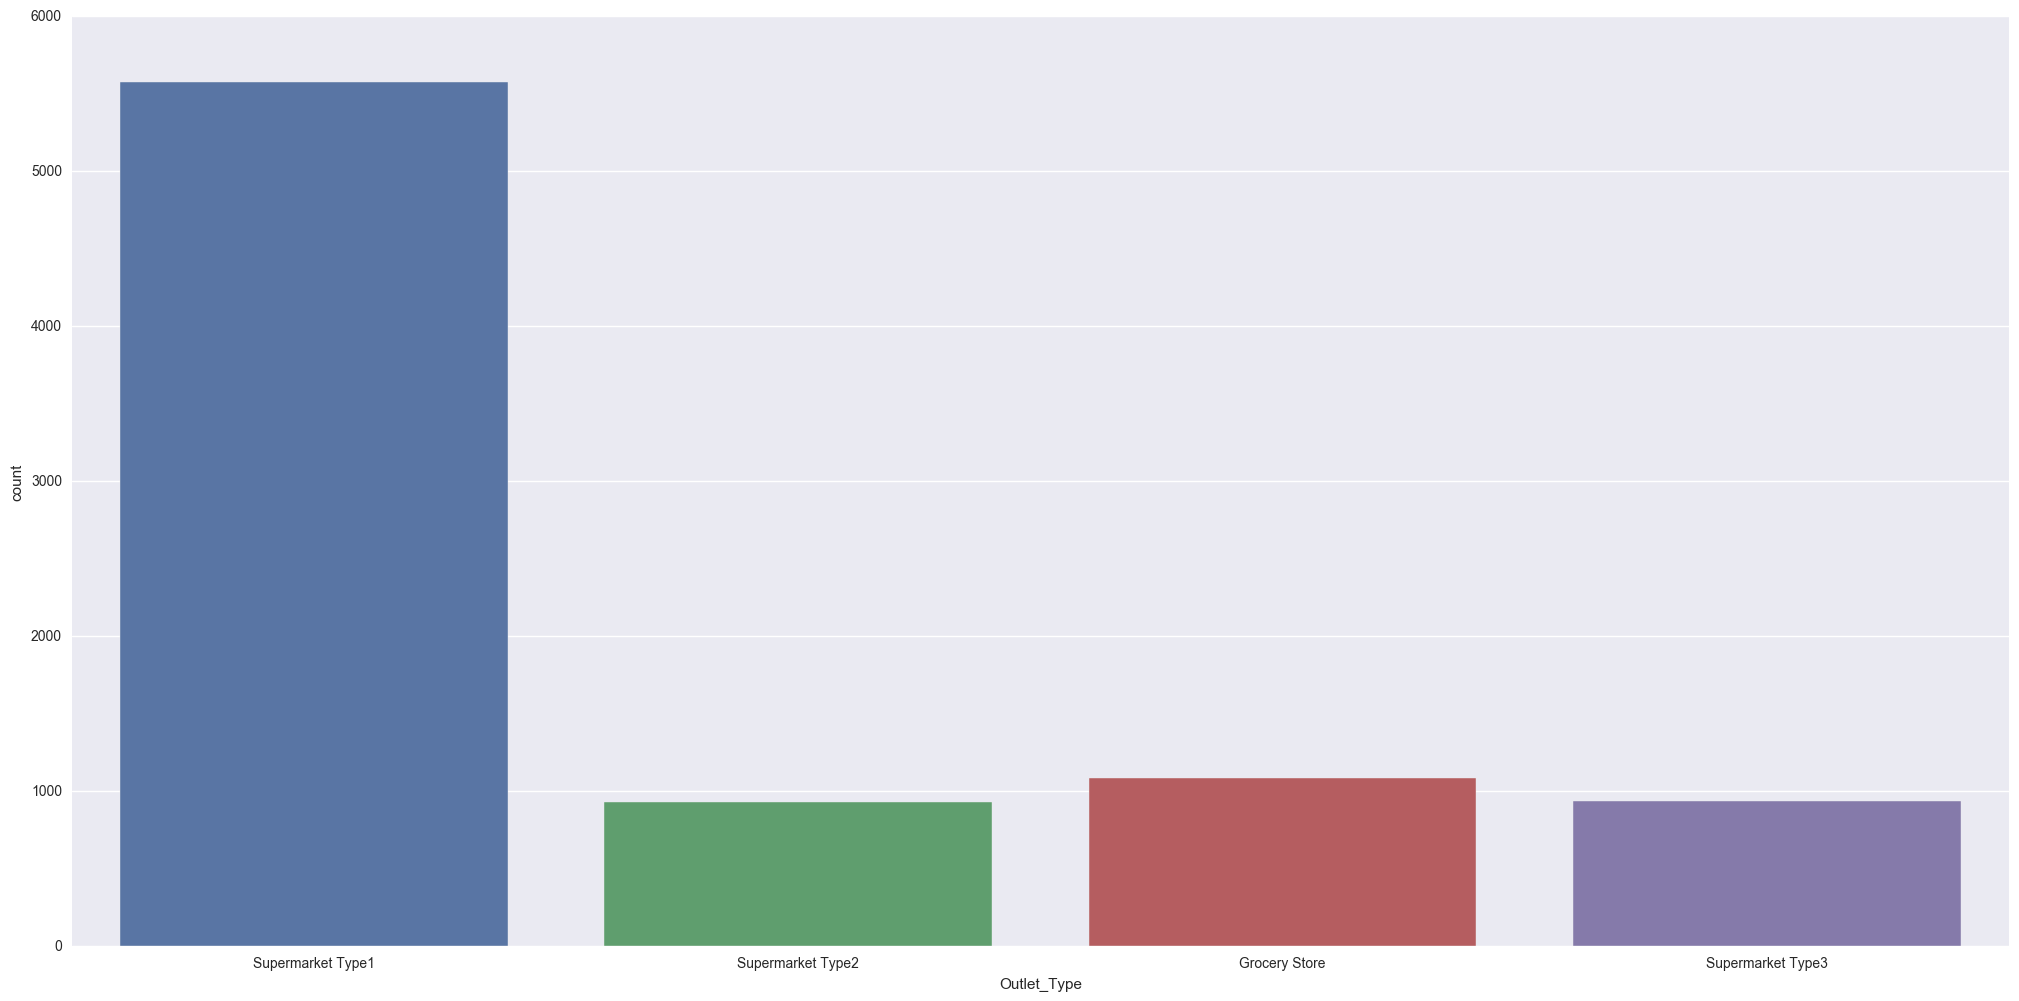

In [18]:
sns.countplot( df['Outlet_Type'] );

# Bivariate Analysis

## Numerical Variables

### Item_Weight and Item_Outlet_Sales Analysis

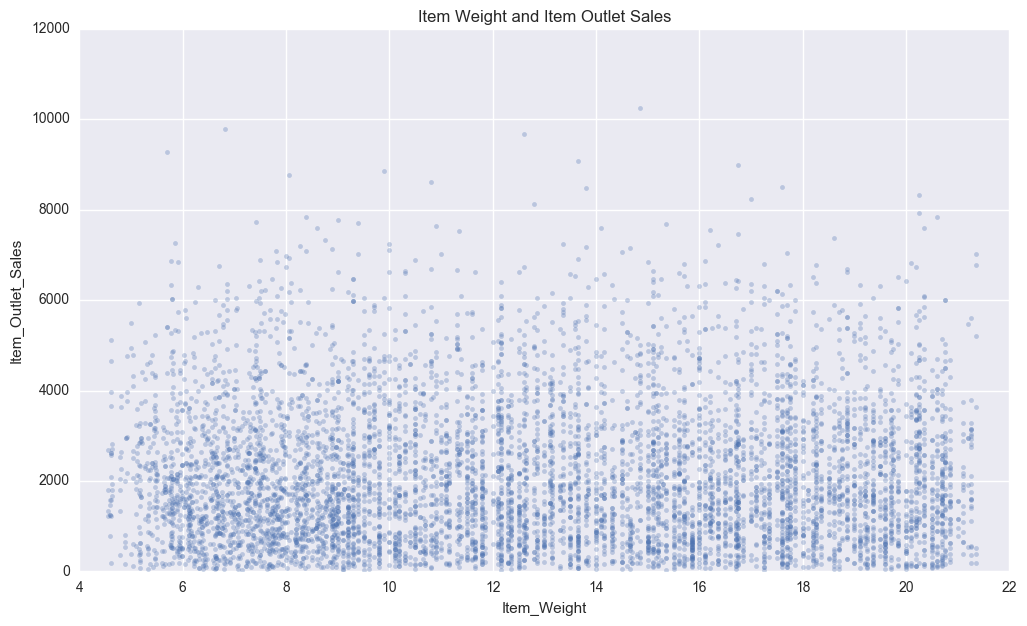

In [19]:
plt.figure( figsize=(12,7) )
plt.xlabel( 'Item_Weight' )
plt.ylabel( 'Item_Outlet_Sales' )
plt.title( 'Item Weight and Item Outlet Sales' )
plt.plot( df['Item_Weight'], df['Item_Outlet_Sales'], '.', alpha=0.3 );

### Item_Visibility and Item_Outlet_Sales Analysis

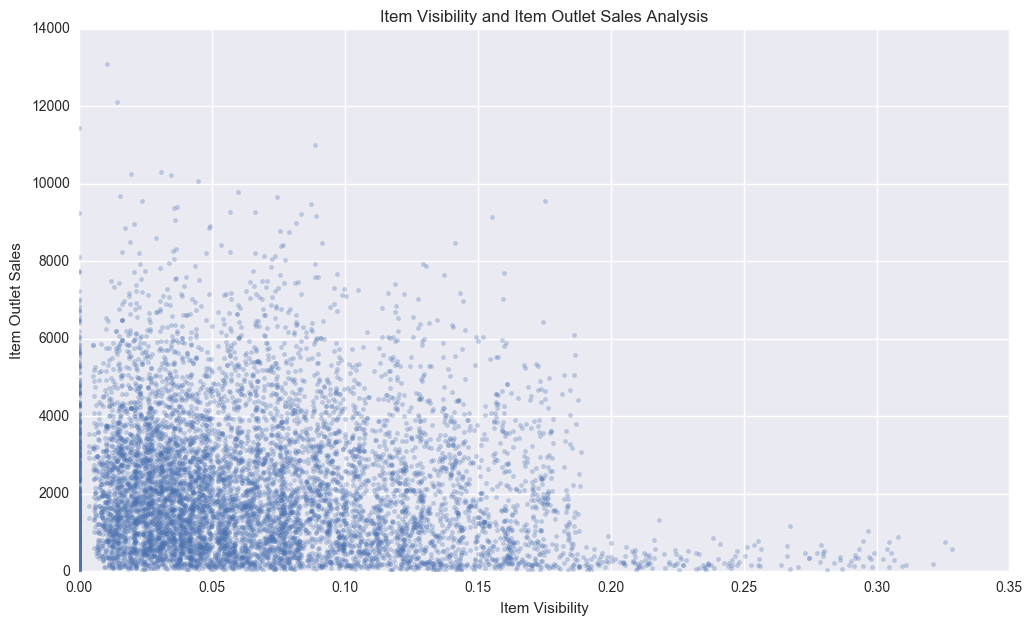

In [20]:
plt.figure( figsize=( 12, 7) )
plt.xlabel( 'Item Visibility' )
plt.ylabel( 'Item Outlet Sales' )
plt.title( 'Item Visibility and Item Outlet Sales Analysis')
plt.plot( df['Item_Visibility'], df['Item_Outlet_Sales'], '.', alpha=0.3 );

### Outlet_Establishment_Year and Item_Outlet_Sales

In [21]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


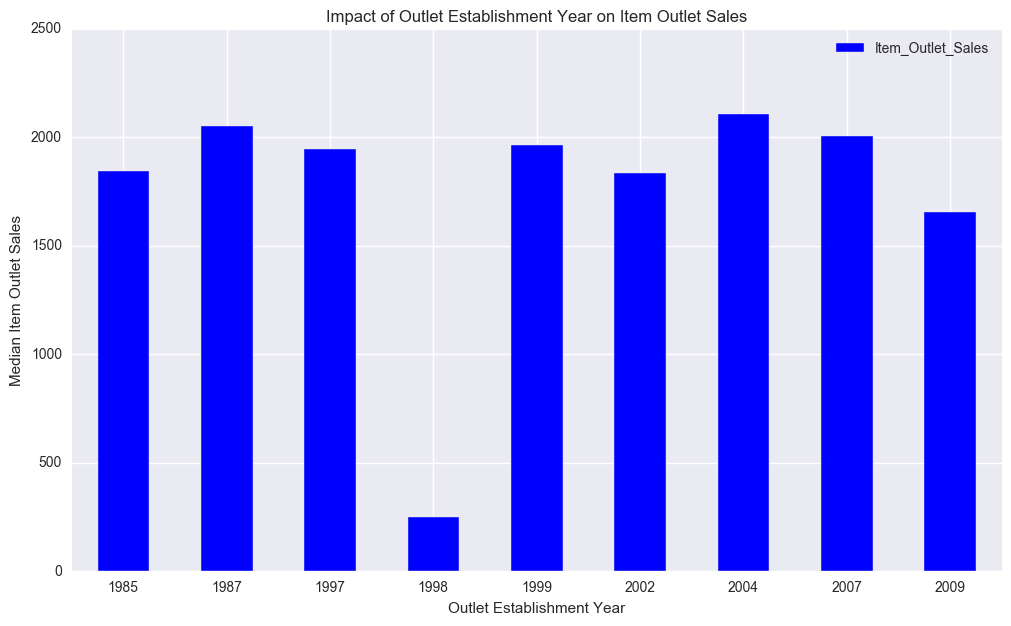

In [22]:
a = df[['Outlet_Establishment_Year', 'Item_Outlet_Sales']].groupby( 'Outlet_Establishment_Year' ).median()
a.plot( kind='bar', color='blue', figsize=( 12, 7 ) );

plt.xlabel( 'Outlet Establishment Year' )
plt.ylabel( 'Median Item Outlet Sales')
plt.title( 'Impact of Outlet Establishment Year on Item Outlet Sales' )
plt.xticks( rotation=0 );

In [23]:
corr['Item_Outlet_Sales'].sort_values( ascending=False )

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

## Categorical Variables

### Impact of Item_Fat_Content on Item_Outlet_Sales

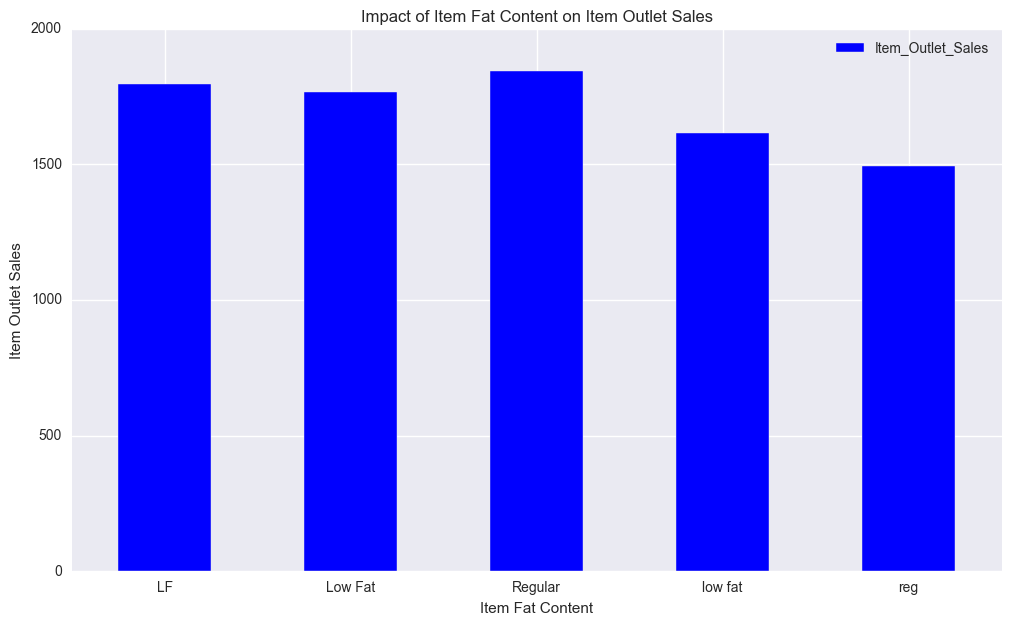

In [24]:
a = df[['Item_Fat_Content', 'Item_Outlet_Sales']].groupby( 'Item_Fat_Content' ).median()
a.plot( kind='bar', color='blue', figsize=( 12, 7 ) )
plt.xlabel( 'Item Fat Content' )
plt.ylabel( 'Item Outlet Sales' )
plt.title( 'Impact of Item Fat Content on Item Outlet Sales' )
plt.xticks( rotation=0 );

### Impact of Outlet_Identifier on Item_Outlet_Sales

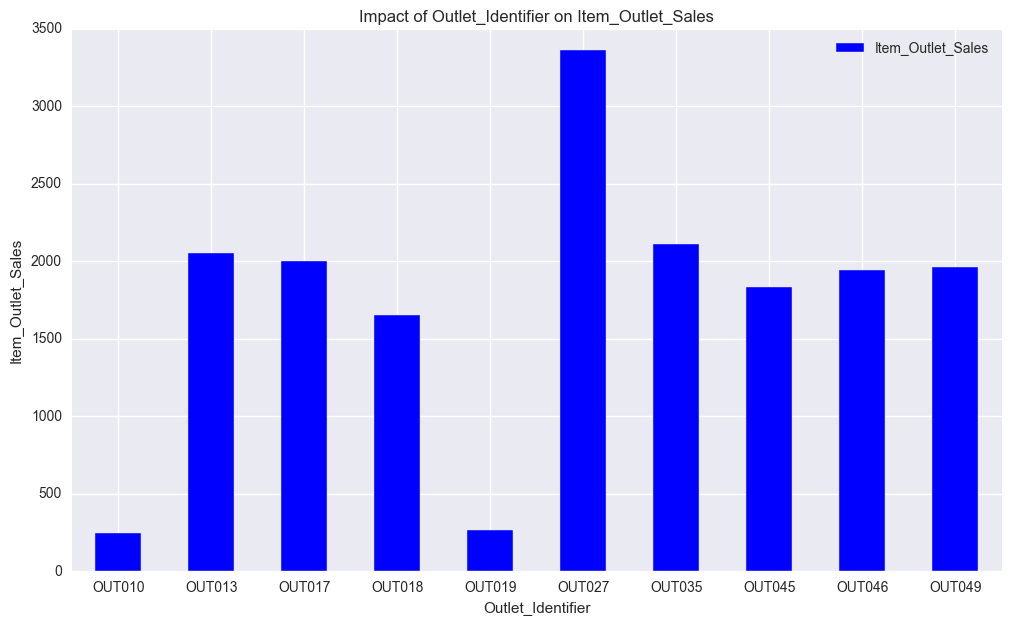

In [25]:
a = df[['Outlet_Identifier', 'Item_Outlet_Sales']].groupby( 'Outlet_Identifier' ).median()
a.plot( kind='bar', color='blue', figsize=(12,7) )

plt.xlabel( 'Outlet_Identifier' )
plt.ylabel( 'Item_Outlet_Sales' )
plt.title( 'Impact of Outlet_Identifier on Item_Outlet_Sales' )
plt.xticks( rotation=0 );

In [26]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [27]:
df[['Outlet_Type','Outlet_Identifier', 'Item_Outlet_Sales']].groupby( ['Outlet_Identifier', 'Outlet_Type'] ).count().reset_index() 

,Outlet_Identifier,Outlet_Type,Item_Outlet_Sales
0,OUT010,Grocery Store,555
1,OUT013,Supermarket Type1,932
2,OUT017,Supermarket Type1,926
3,OUT018,Supermarket Type2,928
4,OUT019,Grocery Store,528
5,OUT027,Supermarket Type3,935
6,OUT035,Supermarket Type1,930
7,OUT045,Supermarket Type1,929
8,OUT046,Supermarket Type1,930
9,OUT049,Supermarket Type1,930


In [28]:
df[['Outlet_Type','Outlet_Size', 'Item_Outlet_Sales']].groupby( ['Outlet_Type', 'Outlet_Size'] ).count().reset_index()

,Outlet_Type,Outlet_Size,Item_Outlet_Sales
0,Grocery Store,Small,528
1,Supermarket Type1,High,932
2,Supermarket Type1,Medium,930
3,Supermarket Type1,Small,1860
4,Supermarket Type2,Medium,928
5,Supermarket Type3,Medium,935


### Impact of Outlet_Size on Item_Outlet_Sales

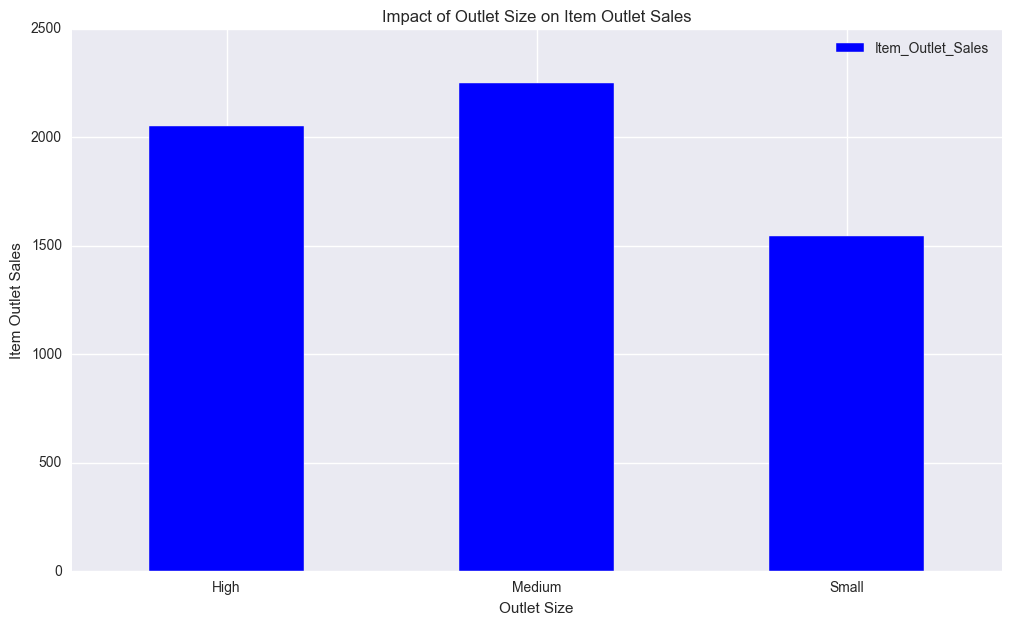

In [29]:
a = df[['Outlet_Size', 'Item_Outlet_Sales']].groupby( 'Outlet_Size' ).median()
a.plot( kind='bar', color='blue', figsize=(12,7) )
plt.xlabel( 'Outlet Size' )
plt.ylabel( 'Item Outlet Sales' )
plt.title( 'Impact of Outlet Size on Item Outlet Sales' )
plt.xticks( rotation=0 );

### Impact of Outlet_Type on Item_Outlet_Sales

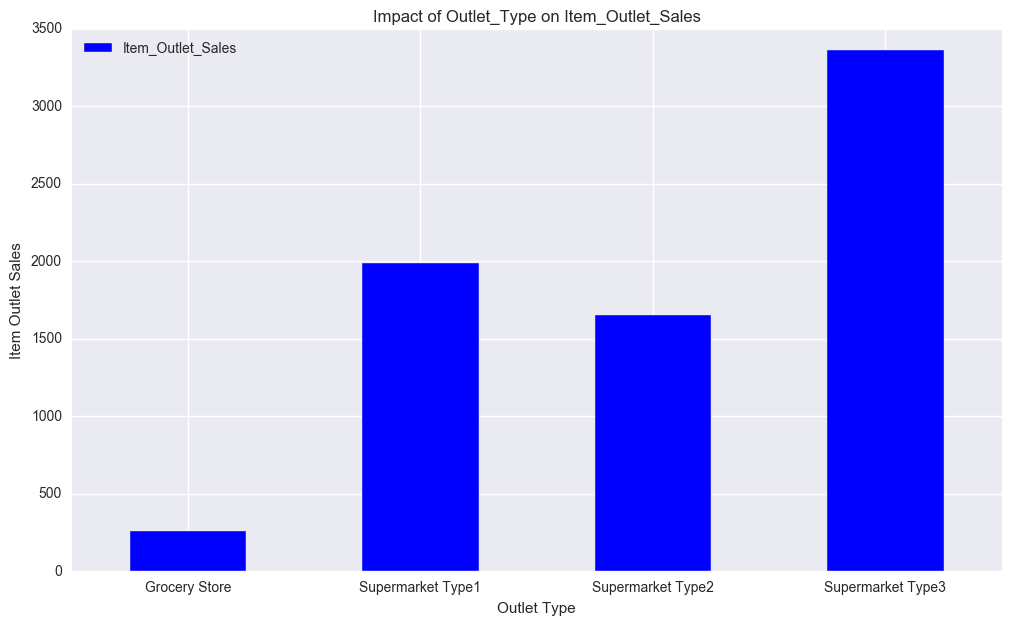

In [30]:
a = df[['Outlet_Type', 'Item_Outlet_Sales']].groupby( 'Outlet_Type' ).median()
a.plot( kind='bar', color='blue', figsize=(12, 7) )
plt.xlabel( 'Outlet Type' )
plt.ylabel( 'Item Outlet Sales' )
plt.title( 'Impact of Outlet_Type on Item_Outlet_Sales' )
plt.xticks( rotation=0 );

### Impact of Outlet_Location_Type on Item_Outlet_Sales

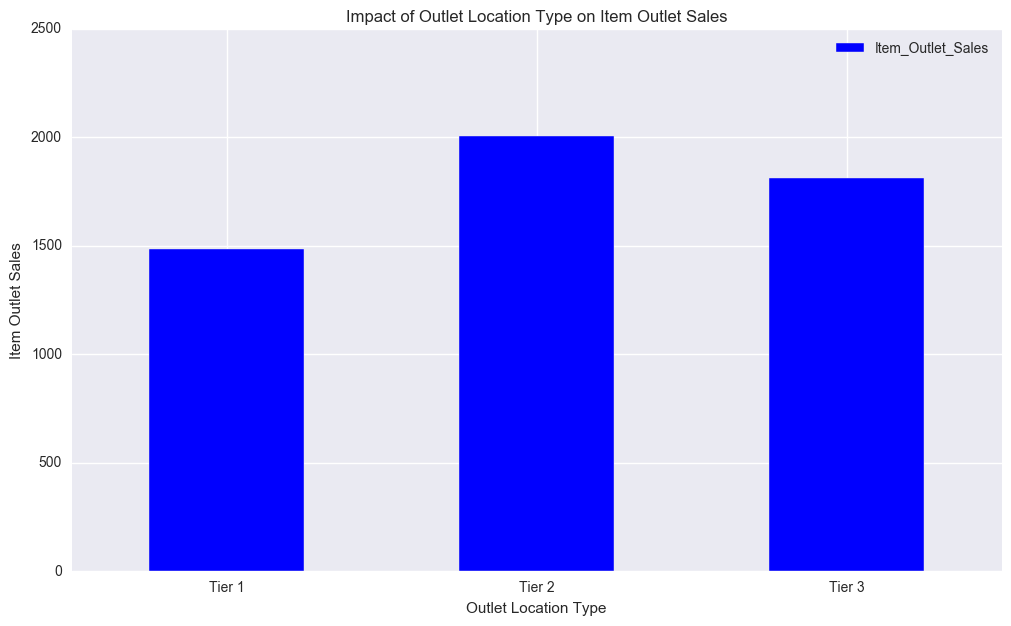

In [31]:
a = df[['Outlet_Location_Type', 'Item_Outlet_Sales']].groupby( 'Outlet_Location_Type' ).median()
a.plot( kind='bar', color='blue', figsize=(12, 7) )
plt.xlabel( 'Outlet Location Type')
plt.ylabel( 'Item Outlet Sales' )
plt.title( 'Impact of Outlet Location Type on Item Outlet Sales' )
plt.xticks( rotation=0 );

---
# Data Pre-processing
---

During the EDA we were able to take some conclusions regarding the first assumptions and the available data:

- **Item_Fat_Content** has valeu 'low fat' writen in different manners.
- For **Item_Type** we try to create a new feature that does not have 16 unique values.
- Similar, **Item_Weight** and **Outlet_Size** seem to present **NaN** values.
- There seems to be 1562 unique items only available in a single store.

## Missing values

In [32]:
# Join Train and Test dataset
df_test = df_raw_test

In [33]:
# Create source column to later separate the data easily
df['source'] = 'train'
df_test['source'] = 'test'

data = pd.concat( [df, df_test], ignore_index=True )
print( df.shape, df_test.shape, data.shape )

(8523, 13) (5681, 12) (14204, 13)


In [34]:
# Check the percentage of null values per variable
data.isnull().sum() / data.shape[0]*100

Item_Fat_Content              0.000000
Item_Identifier               0.000000
Item_MRP                      0.000000
Item_Outlet_Sales            39.995776
Item_Type                     0.000000
Item_Visibility               0.000000
Item_Weight                  17.171219
Outlet_Establishment_Year     0.000000
Outlet_Identifier             0.000000
Outlet_Location_Type          0.000000
Outlet_Size                  28.273726
Outlet_Type                   0.000000
source                        0.000000
dtype: float64

### Input the mean for Item_Weight missing values

In [35]:
item_identifier_average = data[['Item_Weight', 'Item_Identifier']].groupby( 'Item_Identifier' ).mean()
item_identifier_average.head()

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115


In [36]:
def impute_weight( cols ):
    weight = cols[0]
    identifier = cols[1]
    
    if pd.isnull( weight ):
        return item_identifier_average['Item_Weight'][item_identifier_average.index == identifier ]
    else:
        return weight
    
print( 'Original #missing: {}'.format( sum( data['Item_Weight'].isnull() ) ) )

data['Item_Weight'] = data[['Item_Weight', 'Item_Identifier']].apply( impute_weight, axis=1 ).astype( float )

print( 'Final #missing: {}'.format( sum( data['Item_Weight'].isnull() ) ) )
    

Original #missing: 2439
Final #missing: 0


### Inputing Outlet_Size missing values with the mode

In [37]:
#Import mode function:
from scipy.stats import mode
#Determing the mode for each
outlet_size_mode = data[['Outlet_Size', 'Outlet_Type']].groupby( 'Outlet_Size' ).agg( lambda x: x.value_counts().index[0] )
#outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=lambda x:x.mode())
outlet_size_mode

,Outlet_Type
Outlet_Size,
High,Supermarket Type1
Medium,Supermarket Type3
Small,Supermarket Type1


In [38]:
def impute_size_mode( cols ):
    Size = cols[0]
    Type = cols[1]
    
    if pd.isnull( Size ):
        return outlet_size_mode.loc['Outlet_Size'][outlet_size_mode.columns == Type ][0]
    else:
        return Size
    
print( 'Original #missing: {}'.format( sum( data['Outlet_Size'].isnull() ) ) )

data['Outlet_Size'] = data[['Outlet_Type', 'Outlet_Size']].apply( impute_size_mode, axis=1 )

print( 'Final #missing: {}'.format( sum( data['Outlet_Size'].isnull() ) ) )


Original #missing: 4016
Final #missing: 0


---
# Feature Engineering
---

### Inputing Item_Visibility minimum zero

In [39]:
visibility_item_avg = data[['Item_Identifier', 'Item_Visibility']].groupby( 'Item_Identifier' ).mean()
visibility_item_avg.head()

,Item_Visibility
Item_Identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384
DRB01,0.079736
DRB13,0.006799


In [40]:
# Item_Visibility_Mean_Ratio
def impute_visibility_mean(cols):
    visibility = cols[0]
    item = cols[1]
    if visibility == 0:
        return visibility_item_avg['Item_Visibility'][visibility_item_avg.index == item]
    else:
        return visibility
print ('Original #zeros: %d'%sum(data['Item_Visibility'] == 0))
data['Item_Visibility'] =  data[['Item_Visibility','Item_Identifier']].apply(impute_visibility_mean,axis=1).astype(float)
print ('Final #zeros: %d'%sum(data['Item_Visibility'] == 0))

Original #zeros: 879
Final #zeros: 0


### Determine Year of Operation of a store

In [41]:
data['Outlier_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlier_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlier_Years, dtype: float64

### Create a broder category of Item_Type

In [42]:
data['Item_Type_Combined'] = data['Item_Identifier'].apply( lambda x: x[0:2] )

# rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map( {'FD': 'Fodd', 'NC':'Non-Consumable', 'DR':'Drinks'} )   
data['Item_Type_Combined'].value_counts()

Fodd              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [43]:
### Modify Categories of Item_Fat_Content
print( 'Original Categories:')
print( data['Item_Fat_Content'].value_counts() )

print( '\nModified Categories:')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace( {'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'} )
print( data['Item_Fat_Content'].value_counts() )

data.loc[data['Item_Type_Combined'] == 'Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
data['Item_Fat_Content'].value_counts()

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

---
# Feature Transformation
---

### Categorical Variables - One Hot Encoding

In [44]:
le = LabelEncoder()

# new variable for outlet
data['Outlet'] = le.fit_transform( data['Outlet_Identifier'] )

var_mod = ['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Size', 'Item_Type_Combined', 'Outlet_Type', 'Outlet']

for i in var_mod:
    data[i] = le.fit_transform( data[i] )

In [45]:
# dummy variables
data = pd.get_dummies( data, columns=['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'Item_Type_Combined', 'Outlet'] )
data.dtypes

Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
source                        object
Outlier_Years                  int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Size_3                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
O

## Exporting Data

In [46]:
# drop the columns which have been converted to different types
data.drop( ['Item_Type', 'Outlet_Establishment_Year'], axis=1, inplace=True )

# divide into test and train
train = data.loc[ data['source'] == 'train'  ]
test = data.loc[ data['source'] == 'test' ]

# drop unnecessary columns
test.drop( ['Item_Outlet_Sales', 'source'], axis=1, inplace=True )
train.drop( ['source'], axis=1, inplace=True )

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


---
# Model Building
---

In [47]:
train_df = train
test_df = test

In [54]:
# define target and ID columns
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier', 'Outlet_Identifier']

def modelfit( alg, dtrain, dtest, predictors, target, IDcol ):
    # fit the algorithm on the data
    alg.fit( dtrain[predictors], dtrain[target] )
    
    # predict training set
    dtrain_predictions = alg.predict( dtrain[predictors] )
    
    # remember the target had been normalized
    Sq_train = ( dtrain[target] )** 2
    
    # perform cross-validation
    cv_score = cross_validation.cross_val_score( alg, dtrain[predictors], Sq_train, cv=20, scoring='neg_mean_squared_error' )
    cv_score = np.sqrt( np.abs( cv_score ) )
    
    # print model report:
    print( '\nModel Report' )
    print( 'RMSE: {}'.format( np.sqrt( metrics.mean_squared_error( Sq_train.values, dtrain_predictions ) ) ) )
    print( 'CV Score: Mean - {} | Std - {} | Min - {} | Max - {}'.format( np.mean( cv_score ), np.std( cv_score ), np.min( cv_score ), np.max( cv_score )  ) )
    
    # predict on testing data
    dtest[target] = alg.predict( dtest[predictors] )

## Linear Regression Model

In [55]:
LR = LinearRegression( normalize=True )

predictors = train_df.columns.drop( ['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier'] )
modelfit( LR, train_df, test_df, predictors, target, IDcol )


Model Report
RMSE: 13995554.14818911
CV Score: Mean - 9124514.423008064 | Std - 1027317.9805509095 | Min - 7770006.656166205 | Max - 11712949.646480614


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
